In [1]:
from utils import load_model_from_checkpoint
import os
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
def get_train_loss_over_epochs(path_to_checkpoints):
    epochs = []
    loss = []
    for checkpoint_path in tqdm(os.listdir(path_to_checkpoints)):
        if 'batch_233' in checkpoint_path:
            checkpoint = load_model_from_checkpoint(os.path.join(path_to_checkpoints, checkpoint_path), DEVICE)
            epochs.append(checkpoint['epoch'])
            loss.append(checkpoint['loss'].item())

    return epochs, loss

In [12]:
path = '/mnt/d/mimic-cxr-jpg/model/GoogLeNetTangCustom-1GPU-dmacres/checkpoints'

epochs, loss = get_train_loss_over_epochs(path)
df = pd.DataFrame({'Epoch': epochs, 'Loss': loss})
df.to_csv('../../data/models/googlenet-train-loss.csv')

100%|██████████| 102/102 [02:31<00:00,  1.48s/it]


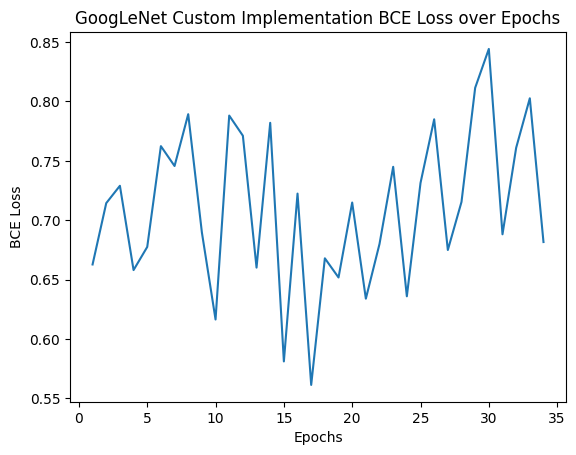

In [17]:
df.sort_values(by = 'Epoch', inplace = True)
plt.plot(df.Epoch, df.Loss)
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.title('GoogLeNet Custom Implementation BCE Loss over Epochs')
plt.show()

In [18]:

path = '/mnt/d/mimic-cxr-jpg/model/ResNet18CustomShowkatWrapper-1GPU-dmacres/checkpoints'

epochs, loss = get_train_loss_over_epochs(path)
df = pd.DataFrame({'Epoch': epochs, 'Loss': loss})
df.to_csv('../../data/models/resnet-train-loss.csv')

100%|██████████| 231/231 [01:08<00:00,  3.37it/s]


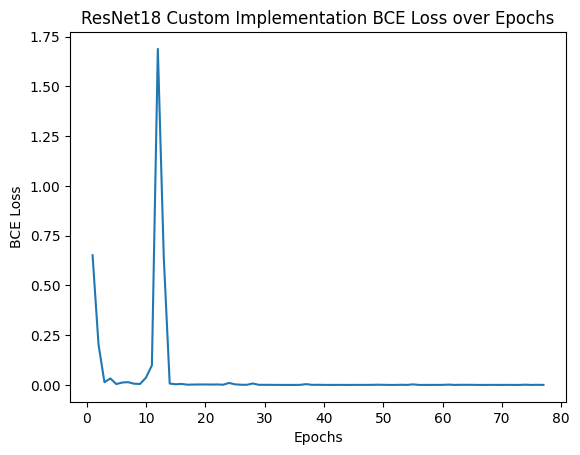

In [20]:
df.sort_values(by = 'Epoch', inplace = True)
plt.plot(df.Epoch, df.Loss)
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.title('ResNet18 Custom Implementation BCE Loss over Epochs')
plt.show()